# Advent Code Day 3



In [34]:
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot
from shapely.geometry import box
import itertools

In [2]:
df = pd.read_csv('slice.csv', header=None)
df.head()

,0
0,"#1 @ 520,746: 4x20"
1,"#2 @ 274,680: 19x26"
2,"#3 @ 928,402: 16x24"
3,"#4 @ 338,969: 27x15"
4,"#5 @ 48,306: 21x16"


In [3]:
#df = df.rename(columns={'0':'values'})
df['num'] = df[0].str.split(' ').str.get(0)
df['@'] = df[0].str.split(' ').str.get(1)
df['coord'] = df[0].str.split(' ').str.get(2)
df['x'] = df['coord'].str.split(',').str.get(0).astype(int)
df['y'] = df['coord'].str.split(',').str.get(1)
df['dim'] = df[0].str.split(' ').str.get(3)
df['len'] = df['dim'].str.split('x').str.get(0).astype(int)
df['height'] = df['dim'].str.split('x').str.get(1).astype(int)
df.head()

,0,num,@,coord,x,y,dim,len,height
0,"#1 @ 520,746: 4x20",#1,@,"520,746:",520,746:,4x20,4,20
1,"#2 @ 274,680: 19x26",#2,@,"274,680:",274,680:,19x26,19,26
2,"#3 @ 928,402: 16x24",#3,@,"928,402:",928,402:,16x24,16,24
3,"#4 @ 338,969: 27x15",#4,@,"338,969:",338,969:,27x15,27,15
4,"#5 @ 48,306: 21x16",#5,@,"48,306:",48,306:,21x16,21,16


In [4]:
df_clean = df
df_clean = df_clean.drop(columns=['num','@','coord','dim'])
df_clean['y'] = df_clean['y'].str.replace(':','').astype(int)
df_clean['x_max'] = df_clean['x'] + df_clean['len']
df_clean['y_max'] = df_clean['y'] + df_clean['height']
df_clean.head()

,0,x,y,len,height,x_max,y_max
0,"#1 @ 520,746: 4x20",520,746,4,20,524,766
1,"#2 @ 274,680: 19x26",274,680,19,26,293,706
2,"#3 @ 928,402: 16x24",928,402,16,24,944,426
3,"#4 @ 338,969: 27x15",338,969,27,15,365,984
4,"#5 @ 48,306: 21x16",48,306,21,16,69,322


## Experimenting with Shapely
### box(minx, miny, maxx, maxy)

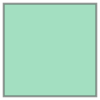

In [5]:
b1 = box(0.0, 0.0, 1.0, 1.0)
b1

In [6]:
list(b1.exterior.coords)

[(1.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0)]

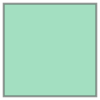

In [7]:

b2 = box(0.0, 0.0, 1.0, 1.0)
b2

In [8]:
list(b2.exterior.coords)

[(1.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0)]

In [9]:
b1.intersects(b2)

True

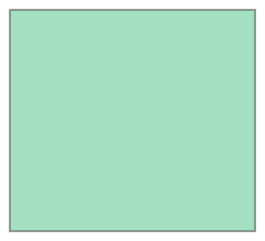

In [10]:
b3 = box(df_clean.iloc[0,1],df_clean.iloc[0,5], df_clean.iloc[0,6], df_clean.iloc[0,2])
b3

In [11]:
list(b3.exterior.coords)

[(766.0, 524.0),
 (766.0, 746.0),
 (520.0, 746.0),
 (520.0, 524.0),
 (766.0, 524.0)]

# Using Shapely on the DF

In [12]:
len(df_clean)

1407

In [13]:
# create a place to store all of the boxes
i = 0
box_list = []
while i < 1407:
    b = box(df_clean.iloc[i,1],df_clean.iloc[i,5], df_clean.iloc[i,6], df_clean.iloc[i,2])
    box_list.append(b)
    i += 1
len(box_list)

1407

In [14]:
# another test of logic
# logic = box_list[0].intersects(box_list[4])
# logic

In [15]:
# test_list = [1, 2, 3, 4, 5]
# test_list2 = test_list[1:]
# test_list2

In [33]:
# creating a place to store all of the results
intersect_list = []
for a, b in itertools.combinations(box_list, 2):
    test = a.intersects(b)
    intersect_list.append(test)
    
print(len(intersect_list))
print(sum(intersect_list)-1407)

989121
678386


In [27]:
# # checking length of intersect_list against arithmetic sequence
# lower = 0
# upper = 1407
# total = sum(range(lower, upper))
# print(total)
# print(intersect_list[0:10])

989121
